In [1]:
import pandas as pd

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'

column_names_pt_br = [
    'classe',
    'alcool',
    'acido_malico',
    'cinzas',
    'alcalinidade_de_cinzas',
    'magnesio',
    'fenois_totais',
    'flavanoides',
    'fenois_nao_flavanoides',
    'proantocianinas',
    'intensidade_de_cor',
    'matiz',
    'od280_od315_de_vinhos_diluidos',
    'prolina'
]

vinhos = pd.read_csv(url, names=column_names_pt_br, dtype={'classe': object})
vinhos.head()


,classe,alcool,acido_malico,cinzas,alcalinidade_de_cinzas,magnesio,fenois_totais,flavanoides,fenois_nao_flavanoides,proantocianinas,intensidade_de_cor,matiz,od280_od315_de_vinhos_diluidos,prolina
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
from sklearn.preprocessing import MinMaxScaler
X = vinhos.drop('classe', axis=1)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
pd.DataFrame(X_scaled, columns=X.columns).head()


,alcool,acido_malico,cinzas,alcalinidade_de_cinzas,magnesio,fenois_totais,flavanoides,fenois_nao_flavanoides,proantocianinas,intensidade_de_cor,matiz,od280_od315_de_vinhos_diluidos,prolina
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963


In [3]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
vinhos['cluster'] = kmeans.fit_predict(X_scaled)
print(f'Inércia do modelo K-Means: {kmeans.inertia_}')

Inércia do modelo K-Means: 44.88760458085281


In [4]:
print("Distribuição dos clusters:")
print(vinhos['cluster'].value_counts())

Distribuição dos clusters:
cluster
2    59
1    50
0    36
3    33
Name: count, dtype: int64


In [5]:
print("Distribuição das classes dentro dos clusters (usando groupby):")
comparacao_groupby = vinhos.groupby('cluster')['classe'].value_counts()
print(comparacao_groupby)
print("\nTabela cruzada entre classes e clusters:")
comparacao_crosstab = pd.crosstab(vinhos['classe'], vinhos['cluster'])
print(comparacao_crosstab)

Distribuição das classes dentro dos clusters (usando groupby):
cluster  classe
0        2         34
         1          2
1        3         48
         2          2
2        1         57
         2          2
3        2         33
Name: count, dtype: int64

Tabela cruzada entre classes e clusters:
cluster   0   1   2   3
classe                 
1         2   0  57   0
2        34   2   2  33
3         0  48   0   0


C:\Users\Remakker\AppData\Local\Temp\ipykernel_10268\2595186820.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=vinhos, x='cluster', palette='viridis')


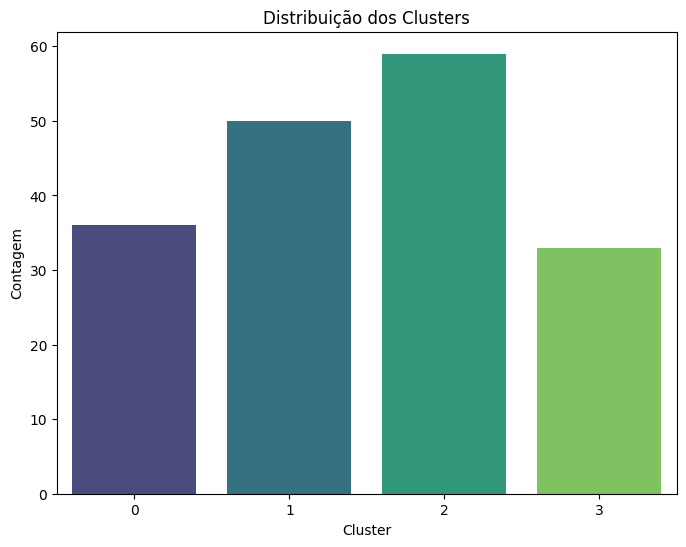

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.countplot(data=vinhos, x='cluster', palette='viridis')
plt.title("Distribuição dos Clusters")
plt.xlabel("Cluster")
plt.ylabel("Contagem")
plt.show()